## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現
Ans:momentum越大,收斂速度越快,使用nesterov可以使曲線較平滑,且準確度也較高

In [16]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.85, 0.8]

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mo-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Momentum = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0679 - acc: 0.2577 - val_loss: 1.9294 - val_acc: 0.3218
Epoch 2/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8742 - acc: 0.3412 - val_loss: 1.8298 - val_acc: 0.3617
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7973 - acc: 0.3682 - val_loss: 1.7787 - val_acc: 0.3651
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7503 - acc: 0.3845 - val_loss: 1.7383 - val_acc: 0.3881
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7123 - acc: 0.3971 - val_loss: 1.7024 - val_acc: 0.4042
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6810 - acc: 0.4103 - val_loss: 1.6677 - val_acc: 0.4130
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6509 - acc: 0.4199 - val_loss: 1.6391 - val_acc

50000/50000 [==============================] - 3s 54us/step - loss: 1.9563 - acc: 0.3112 - val_loss: 1.9063 - val_acc: 0.3335
Epoch 3/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8757 - acc: 0.3421 - val_loss: 1.8519 - val_acc: 0.3549
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8280 - acc: 0.3609 - val_loss: 1.8076 - val_acc: 0.3670
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7912 - acc: 0.3738 - val_loss: 1.7753 - val_acc: 0.3839
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7621 - acc: 0.3845 - val_loss: 1.7472 - val_acc: 0.3916
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7371 - acc: 0.3930 - val_loss: 1.7267 - val_acc: 0.3972
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7132 - acc: 0.4013 - val_loss: 1.7053 - val_acc: 0.4053
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 56us/step - loss: 1.9076 - acc: 0.3346 - val_loss: 1.8743 - val_acc: 0.3514
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8501 - acc: 0.3540 - val_loss: 1.8384 - val_acc: 0.3588
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8113 - acc: 0.3665 - val_loss: 1.7963 - val_acc: 0.3716
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7801 - acc: 0.3766 - val_loss: 1.7682 - val_acc: 0.3841
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7546 - acc: 0.3875 - val_loss: 1.7431 - val_acc: 0.3891
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7316 - acc: 0.3939 - val_loss: 1.7253 - val_acc: 0.3954
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7111 - acc: 0.4012 - val_loss: 1.7015 - val_acc: 0.4054
Epoch 10/50
50000/50000 [===========================

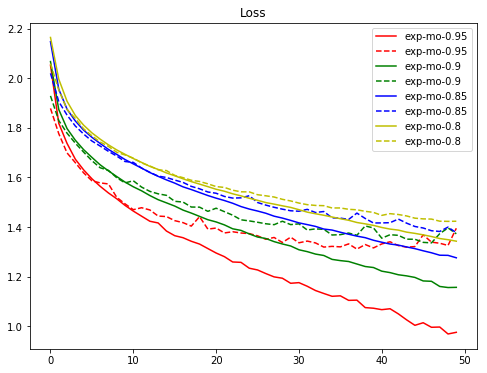

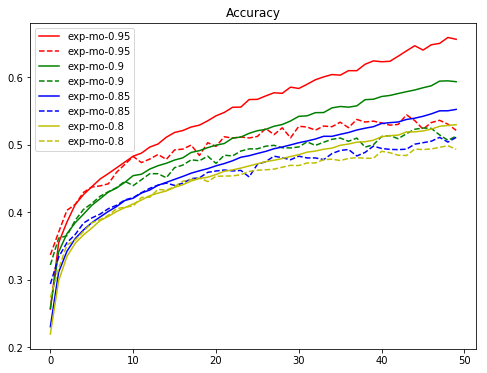

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()